## Task - 01
## Predition Using Supervised ML (Level - Biginner)
### Instruction
1. Predict the pecentage of an student based on tthe no. of study hours.
2. This is a simple Linear Regrassion task as it involves just 2 variables.
3. You can use R, Python, SAS Enterprise Miner or any other tool.
4. Data can be found at http://bit.ly/w-data 
5. What will be predicted score if a student studies for 9.25hrs/day?
 


In [52]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

## Step-01 Reading the Data from the Source

In [53]:
# Reading data from remote link
#url = "http://bit.ly/w-data" 
#s_data = pd.read_csv(url)

f= open('Data Set.csv', mode='r') # file open() function help to fetch data from the source or url.
s_data = pd.read_csv(f) #pd.read_csv() function helps to read the csv formated data.
print("Data imported successfully")

s_data.head() # it returns top 5 row from the data set

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## Step-02 Data Cleaning
Checking how many null values are there in dataset(Handling Missing Values)

In [54]:
s_data.isna().sum()

Hours     0
Scores    0
dtype: int64

Descriptive Analysis of Dataset(using descibe() Function)

In [55]:
s_data.describe() # describe() function return statistical information about the data set. 

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


#### Describe information will transpose for reading purpose

In [56]:
s_data.describe().T # describe().T function returns statistical information about the data set by transposing. 

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


Information about the Data Set(using info() Function)

In [57]:
s_data.info() # info() function will return the figure all information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


## Step-03 Data Visualization
Plotting a scatter plot showing the relationship between Score vs no. of Hours Studies

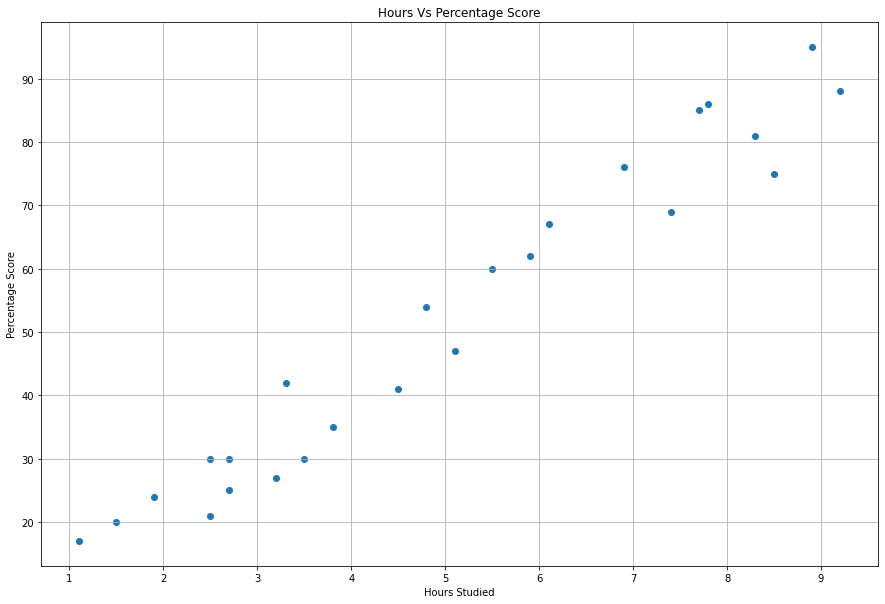

In [58]:
# Plotting the distribution of scores

plt.figure(figsize=(15,10)) # set the width and height of the figure
plt.title('Hours Vs Percentage Score') #Adding title to figure 
plt.xlabel('Hours Studied')  # Adding label for horizontal Axis(X-Axis)
plt.ylabel('Percentage Score')  #Adding label for Adding label for the Vertical Axis(Y-Axis)

#Scatter Chart showing Relationship between Score VS No. of hours Studies
plt.scatter(s_data.Hours, s_data.Scores) 
plt.grid() # showing grid line in the plot
plt.show()

From the graph we can safely assume a positive linear between relationship between the number of hours studies and percentage of score

## Step-4 Data Processing
This step involved division of data into "Attributes"(input) and "labels"(output).

In [59]:
x = s_data.iloc[:, :-1].values
y = s_data.iloc[:,1].values

## Step-05 Model Training
Spliting the data into traning and test sets and training the algorithm

In [60]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)
regressor = LinearRegression() # This is Built-in Linear Regression ML Algorithm.
regressor.fit(X_train.reshape(-1,1),y_train)
print("Traning Complete ")

Traning Complete 


## Step-06 Plotting the Line of Regression

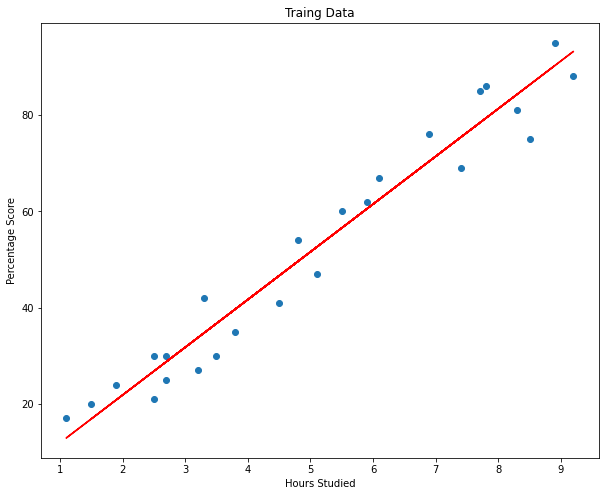

In [61]:
line = regressor.coef_*x+regressor.intercept_ # This is Simple Linear Regression Formula.

plt.figure(figsize=(10,8)) # Set the width and height on the figure
plt.scatter(x,y) # Ploting Scatter plot on the graph.

plt.title('Traing Data') # Added title on the figure
plt.xlabel('Hours Studied') # Added x-axis label on the figure
plt.ylabel('Percentage Score') # Added y-axis label on the figure

plt.plot(x,line, color = 'Red') #Added line on the scatter plot and set  'red'  color
plt.show()

## Step-07 Making Prediction

In [62]:
print(X_test) # Testing Data (In Hours)

y_pred = regressor.predict(X_test) #Predicting the Score (Model Prediction)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


## Step-08 Comparing the Actual result to the predited Model Result

In [63]:
# Comparing Actual value Vs Predicted value.
s_data = pd.DataFrame({'Actual': y_test, "Predicted":y_pred}) # pandas DataFrame help to represent multiple series of data that contains row and column
s_data

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


What will be predicted score if a student studies for 9.25 hrs/ day?

In [64]:
# By using this, we can test any relevant data. 
data_predict = regressor.predict([[9.25]])
data_predict

array([93.69173249])

## Step-09 Evaluating the Model
The final step is to evaluate the performance of the algorithm. This step is particularly to compare how well different algorithms perform on a particular dataset. Here different errors have been calculated to compare the model performance and predict accuracy.

In [65]:
from sklearn import metrics
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,y_pred)) # It will return "Mean Absolute Error(MAE) "
print('Mean Squared Error: ', metrics.mean_squared_error(y_test,y_pred)) # It will return "Mean Squared Error(MSE) "
print('Root Mean Square Error: ',np.sqrt(metrics.mean_squared_error(y_test,y_pred))) # It will return "Root Mean Squared Error(RME) "
print('R-2', metrics.r2_score(y_test,y_pred)) # It will return "R2 scaore(R2)". That will return accuracy of that model.

Mean Absolute Error:  4.183859899002975
Mean Squared Error:  21.598769307217406
Root Mean Square Error:  4.647447612100367
R-2 0.9454906892105355


R-2 gives the score of model fit and this case we have R-2 = 0.9454906892105355 which is actually a great score for this model.

## Conclusion
I am successfully able to carry out Prediction using Simple Linear Regression and also able to evaluate the model performance on various parameters.
##### Thanks!